In [1]:
!jupyter nbconvert --to html "/content/drive/MyDrive/회귀분석.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/회귀분석.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
# 필요한 것들
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지
plt.rc('font', family='NanumBarunGothic') 

# 소수점은 둘째자리까지만
pd.options.display.float_format = '{: .2f}'.format

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv", encoding='euc-kr')

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/최종데이터.xlsx')

In [ ]:
df = pd.DataFrame(df)

In [ ]:
ddd=df[['남성_매출_건수']]

## 주중,주말 매출과 점포수 상관관계

In [ ]:
df['주중_매출_금액_평균'] = df['주중_매출_금액']/5
df['주중_매출_건수_평균'] = df['주중_매출_건수']/5

In [ ]:
df['주말_매출_금액_평균'] = df['주말_매출_금액']/2
df['주말_매출_건수_평균'] = df['주말_매출_건수']/2

In [ ]:
df

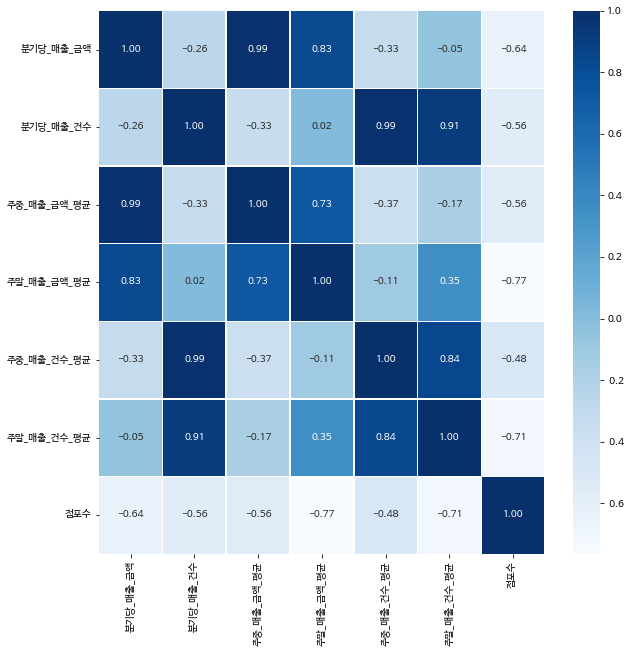

In [ ]:
all=df[['분기당_매출_금액','분기당_매출_건수','주중_매출_금액_평균','주말_매출_금액_평균',
            '주중_매출_건수_평균','주말_매출_건수_평균','점포수']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = all.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 요일별 매출 상관관계

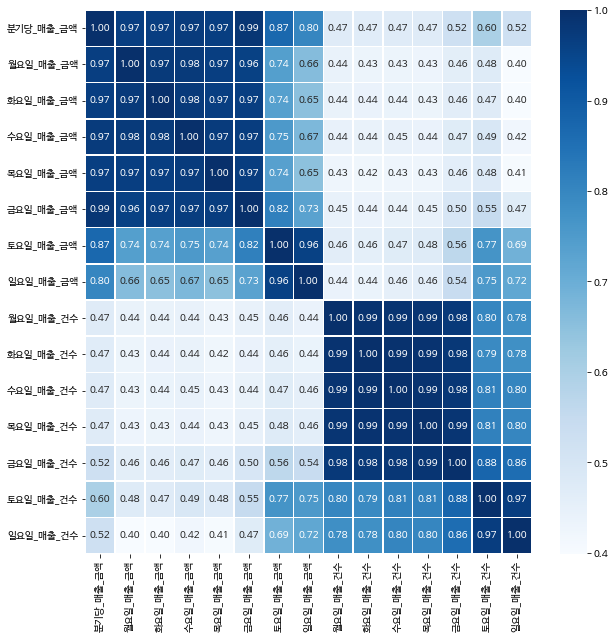

In [ ]:
week=df[['분기당_매출_금액','월요일_매출_금액','화요일_매출_금액','수요일_매출_금액',
             '목요일_매출_금액','금요일_매출_금액','토요일_매출_금액','일요일_매출_금액',
             '월요일_매출_건수','화요일_매출_건수','수요일_매출_건수','목요일_매출_건수',
             '금요일_매출_건수','토요일_매출_건수','일요일_매출_건수']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = week, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 시간대별 매출 상관관계

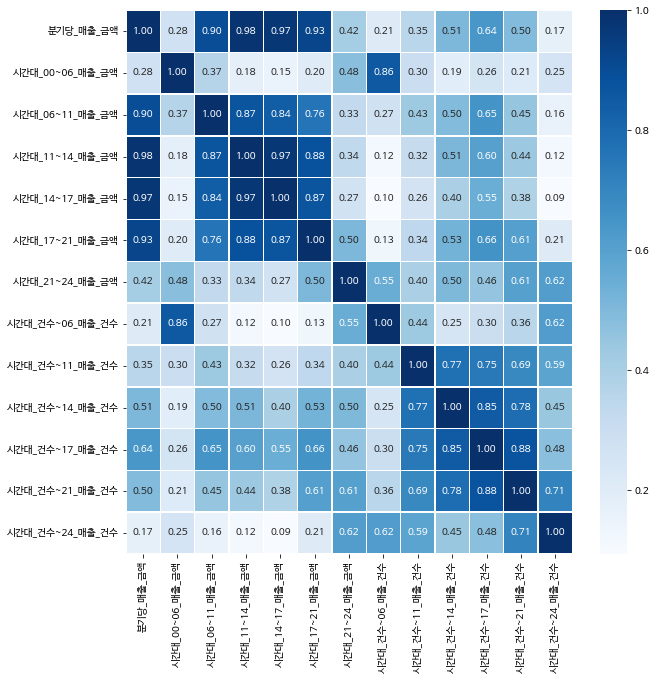

In [ ]:
time=df[['분기당_매출_금액','시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액'
            ,'시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액',
             '시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수'
            ,'시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = time, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 성별 매출 상관관계

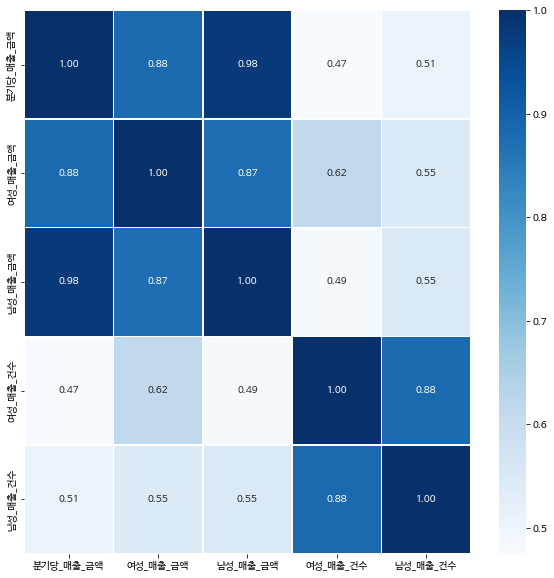

In [ ]:
gender=df[['분기당_매출_금액','여성_매출_금액','남성_매출_금액','여성_매출_건수','남성_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = gender, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 연령대별 매출 상관관계

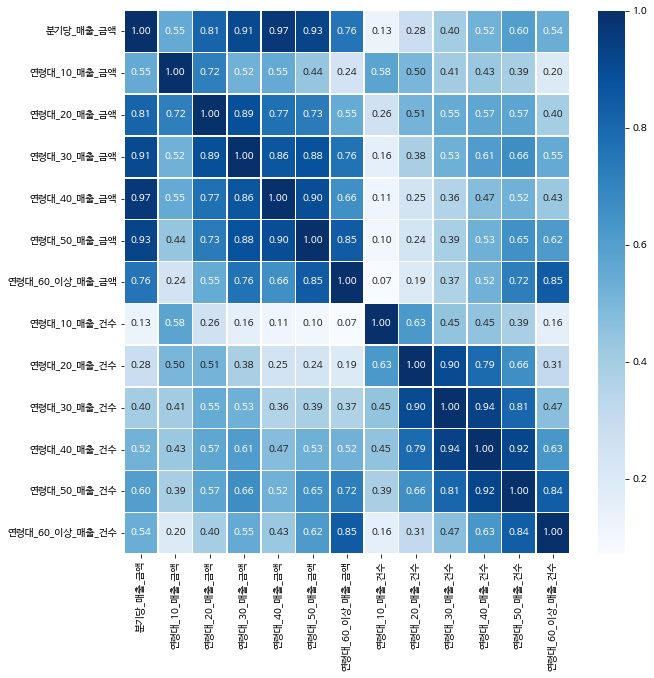

In [ ]:
age=df[['분기당_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액'
           ,'연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액',
            '연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수'
           ,'연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = age, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
df.corr()['분기당_매출_금액'].sort_values(ascending=False).head(30)

분기당_매출_금액          1.00
금요일_매출_금액          0.99
주중_매출_금액           0.98
시간대_11~14_매출_금액    0.98
남성_매출_금액           0.98
시간대_14~17_매출_금액    0.97
수요일_매출_금액          0.97
연령대_40_매출_금액       0.97
월요일_매출_금액          0.97
화요일_매출_금액          0.97
목요일_매출_금액          0.97
연령대_50_매출_금액       0.93
시간대_17~21_매출_금액    0.93
연령대_30_매출_금액       0.91
시간대_06~11_매출_금액    0.90
여성_매출_금액           0.88
토요일_매출_금액          0.87
주말_매출_금액           0.85
연령대_20_매출_금액       0.81
일요일_매출_금액          0.80
연령대_60_이상_매출_금액    0.76
시간대_건수~17_매출_건수    0.64
연령대_50_매출_건수       0.60
토요일_매출_건수          0.60
주말_매출_건수           0.57
연령대_10_매출_금액       0.55
연령대_60_이상_매출_건수    0.54
분기당_매출_건수          0.53
일요일_매출_건수          0.52
금요일_매출_건수          0.52
Name: 분기당_매출_금액, dtype: float64

## 상관분석 결과
- 요일 : 금요일>수요일>월요일>화요일>목요일>토요일>일요일
- 시간대 : 11-14 > 14-17 > 17-21 > 06-11
- 연령대 : 40>50>30>60 이상
- 성별 : 남성>여성

## 매출액과 강한 상관관계를 가진 변수들로 회귀분석 실시 (강한 상관관계 -> 0.7이상)

In [ ]:
new_df = df[['분기당_매출_금액','금요일_매출_금액','주중_매출_금액','시간대_11~14_매출_금액','남성_매출_금액','시간대_14~17_매출_금액',
             '수요일_매출_금액','연령대_40_매출_금액','월요일_매출_금액','화요일_매출_금액','목요일_매출_금액','연령대_50_매출_금액',
             '시간대_17~21_매출_금액','연령대_30_매출_금액','시간대_06~11_매출_금액','여성_매출_금액','토요일_매출_금액',
             '주말_매출_금액','연령대_20_매출_금액','일요일_매출_금액','연령대_60_이상_매출_금액']] 

In [ ]:
X=new_df[['금요일_매출_금액','주중_매출_금액','시간대_11~14_매출_금액','남성_매출_금액','시간대_14~17_매출_금액',
     '수요일_매출_금액','연령대_40_매출_금액','월요일_매출_금액','화요일_매출_금액','목요일_매출_금액','연령대_50_매출_금액',
     '시간대_17~21_매출_금액','연령대_30_매출_금액','시간대_06~11_매출_금액','여성_매출_금액','토요일_매출_금액',
     '주말_매출_금액','연령대_20_매출_금액','일요일_매출_금액','연령대_60_이상_매출_금액']]
Y=new_df['분기당_매출_금액']

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.float_format = '{:.5f}'.format

### 회귀분석 전 다중공선성 해결방법
1. 다중공선성 있는 칼럼 제거
2. 주성분분석(PCA)
-> 다중공선성 있는 칼럼이 대부분이므로 주성분분석 선택

In [ ]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features']=X.columns

vif=vif.sort_values('features').reset_index(drop=True)
#vif.set_index(['features'],inplace=True)
vif # 연령,성별,시간대 빼고 vif 10 이상 -> 다중공선성 있다고 판단 -> 주성분분석 실행

,VIF Factor,features
0,inf,금요일_매출_금액
1,0.29778,남성_매출_금액
2,inf,목요일_매출_금액
3,inf,수요일_매출_금액
4,-0.00099,시간대_06~11_매출_금액
5,0.00051,시간대_11~14_매출_금액
6,-0.00003,시간대_14~17_매출_금액
7,-0.00002,시간대_17~21_매출_금액
8,-0.30426,여성_매출_금액
9,0.19640,연령대_20_매출_금액


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_sca = scaler.fit_transform(X) # 변수들의 단위 표준화

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pc = pca.fit_transform(X_sca)

pcadf = pd.DataFrame(data=pc)

In [ ]:
# 모든 독립변수 개수(20개)만큼 주성분 개수 설정해서 분석하기
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca_array = pca.fit_transform(X_sca)
pca_df = pd.DataFrame(pca_array, index=X.index,
                      columns=[f"pca{num+1}" for num in range(X.shape[1])])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
0,-0.02106,-0.11821,0.09699,-0.14283,-0.03409,0.02277,-0.04282,-0.05147,-0.01226,0.01115,0.02864,-0.02093,0.00170,-0.05656,-0.00148,-0.01811,0.01742,-0.00035,0.00000,-0.00000
1,-0.37259,-0.00490,0.05557,-0.06300,0.02974,-0.01578,0.03066,-0.00581,-0.03770,0.01041,0.00581,-0.01520,0.00320,-0.02147,0.00036,-0.00634,0.01368,-0.00027,0.00000,0.00000
2,-0.45932,0.02446,0.02989,-0.05924,0.02171,0.00296,0.02096,0.00455,-0.02175,0.00344,0.00025,-0.01006,0.00048,-0.00024,0.00041,-0.00014,0.00237,-0.00025,-0.00000,-0.00000
3,-0.45342,0.02498,0.02802,-0.05683,0.02006,0.00296,0.02266,0.00493,-0.02386,0.00457,-0.00075,-0.01062,0.00254,-0.00161,0.00006,-0.00054,0.00360,-0.00028,0.00000,0.00000
4,-0.43805,0.03726,0.03014,-0.06054,0.01100,-0.00173,0.02952,0.00560,-0.01222,0.00984,-0.00501,-0.00714,0.00413,0.00599,-0.00059,-0.00428,0.00204,-0.00030,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140825,0.20047,0.04815,-0.12932,-0.06013,-0.07801,0.01220,-0.01755,0.10111,0.10230,-0.08943,0.10454,0.03253,0.01150,0.04358,-0.04750,0.01413,-0.05305,0.00007,0.00000,-0.00000
140826,8.16800,-3.16844,2.41744,-0.86774,-2.17017,0.65336,0.58508,-0.65466,-0.52565,-0.25458,-0.20666,0.19790,-0.08801,0.73142,-0.27238,0.65620,0.04567,0.00294,0.00000,0.00000
140827,0.77508,-0.28357,-0.31286,-0.01362,-0.04307,0.11512,-0.10329,-0.05036,0.04972,-0.06852,-0.01997,-0.01396,0.09503,0.07069,-0.07057,0.01239,-0.01453,0.00197,-0.00000,0.00000
140828,-0.45352,0.02681,0.02988,-0.05667,0.01536,-0.00170,0.01831,0.00107,-0.01977,0.00201,0.00423,-0.01157,-0.01159,-0.00057,0.00013,0.00115,0.00095,-0.00025,-0.00000,-0.00000


In [ ]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(X.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,17.19384,0.85969,0.85969
pca2,1.41079,0.07054,0.93023
pca3,0.59300,0.02965,0.95988
pca4,0.27697,0.01385,0.97372
pca5,0.13307,0.00665,0.98038
pca6,0.09160,0.00458,0.98496
pca7,0.04835,0.00242,0.98737
pca8,0.04629,0.00231,0.98969
pca9,0.03742,0.00187,0.99156
pca10,0.03435,0.00172,0.99328


In [ ]:
#1번째 주성분을 내림차순으로 정렬해서 어떤 변수가 1번째 주성분 벡터값이 가장 높은지 살펴보기
pca_1 = pca_df[['pca1']]
pca_1 = pca_1.sort_values(by='pca1', ascending=False)
pca_1 = pca_1.reset_index()
pca_1.index = pca_1.index+1
pca_1.index.name = 'Ranking'
pca_1 = pca_1.rename(columns={'index':'Country'})
pca_1.head()

,Country,pca1
Ranking,,
1,127044,545.09828
2,92183,514.09917
3,21475,511.85374
4,131094,458.48514
5,56920,451.77278


In [ ]:
pcadf.head()

,0,1
0,-0.02106,-0.11821
1,-0.37259,-0.00490
2,-0.45932,0.02446
3,-0.45342,0.02498
4,-0.43805,0.03726


In [ ]:
print(pca.explained_variance_ratio_) # 첫 주성분이 대략 86%, 두 번째 주성분이 대략 7%의 분산 설명력을 가짐

[0.8596861  0.07053906]


In [ ]:
sum(pca.explained_variance_ratio_) # 2개의 주성분이 데이터 분포의 특징 중 약 93%를 설명해줌을 의미

1.0000000000000002

## 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

lr=LinearRegression()

In [ ]:
# 회귀분석을 하기 위한 B_0, 상수항 추가
pcadf = sm.add_constant(pcadf, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(Y,pcadf)
model = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              분기당_매출_금액   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.764e+07
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        05:51:55   Log-Likelihood:            -2.9588e+06
No. Observations:              140830   AIC:                         5.918e+06
Df Residuals:                  140827   BIC:                         5.918e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.605e+08   8.59e+05    769.105      0.0

### R2(결정계수)란 모형(즉,독립변수)들이 종속변수를 얼마나 설명하냐를 보여주는 계수이다. X와 Y의 상관관계가 클수록 R2값은 1에 가까워진다. 

### 회귀분석 결과 p값도 모두 유의하고(p<0.05), R2값도 0.997로 설명력이 높음을 알 수 있다.
### -> 이 회귀모형은 통계적으로 유의미하다.